# Some examples of Seaborn visualizations 

This notbeook uses the code from the book [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html), by Jake VanderPlas


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

%matplotlib inline

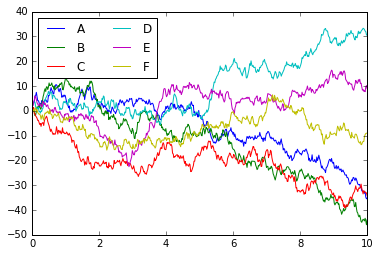

In [6]:
# Random data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

# 1. Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

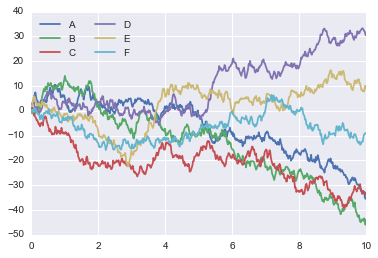

In [7]:
# 2. Now let's see what Seaborn can do
import seaborn as sns
sns.set()

# same data defined above (x, y)
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Exploring Seaborn Plots

### Histograms, KDE, and densities

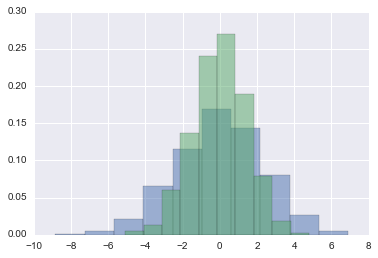

In [8]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

Now a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with sns.kdeplot:

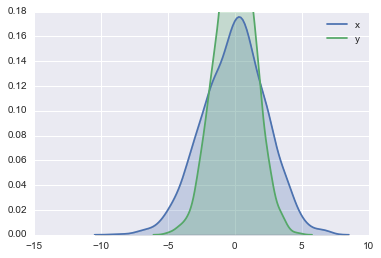

In [9]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using distplot:

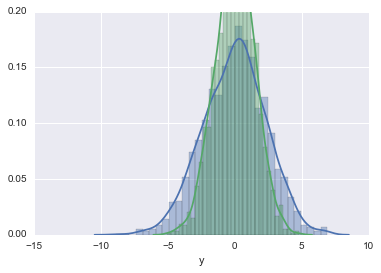

In [11]:
sns.distplot(data['x'])
sns.distplot(data['y']);

### Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

In [12]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Now, sns.pairplot visualization:

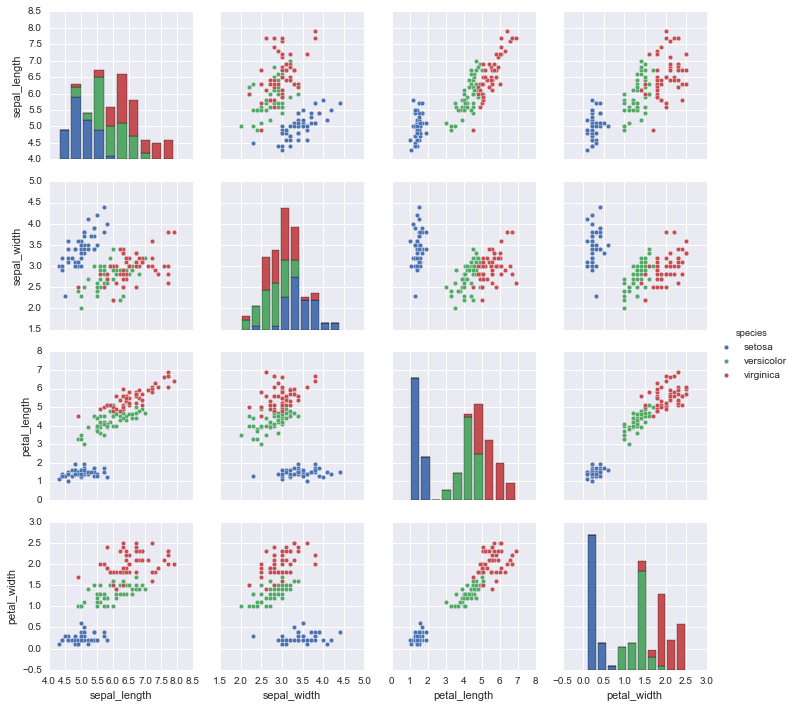

In [13]:
sns.pairplot(iris, hue='species', size=2.5);

### Faceted histograms

In [14]:
# "Tips" dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


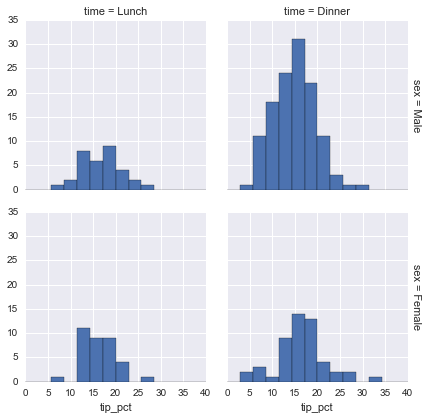

In [15]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));